In [121]:
# import the necessary packages
import matplotlib.pyplot as plt
from PIL import Image
from zipfile import ZipFile
import numpy as np
import argparse
import imutils
import cv2

# load the image
image = cv2.imread('../input/images/frame1.jpg')





(480, 640)


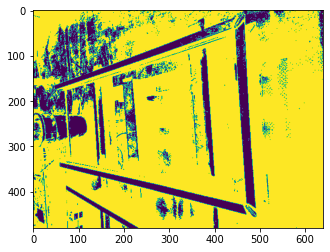

In [122]:
# find all the 'black' shapes in the image
lower = np.array([0, 0, 0])
upper = np.array([180, 180, 180])
shapeMask = cv2.inRange(image, lower, upper)
print (shapeMask.shape)
plt.figure('Black shapes')
plt.imshow(shapeMask)
#plt.axis('off') # if you want to remove coordinates
plt.show()

In [123]:
# find the contours in the mask
cnts = cv2.findContours(shapeMask.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print("I found {} black shapes".format(len(cnts)))
#cv2.imshow("Mask", shapeMask)
#cv2.waitKey(1000)
#cv2.destroyAllWindows()





I found 392 black shapes


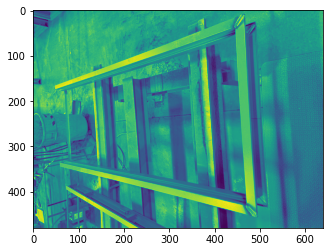

[52.79329608938547, -52.79329608938548, -55.81005586592179, -57.821229050279335, -63.85474860335196, -66.87150837988827, -67.87709497206704, -68.88268156424581, -70.89385474860335, 70.89385474860333, -71.89944134078212, -73.91061452513966, 73.91061452513965, 74.91620111731844, -74.91620111731844, 75.92178770949721, -75.92178770949721, -76.92737430167597, -77.93296089385476, 78.93854748603351, -78.93854748603351, 79.94413407821229, -79.9441340782123, -80.94972067039106, 81.95530726256982, -81.95530726256983, -82.9608938547486, -83.96648044692738, 83.96648044692738, 85.9776536312849, -85.97765363128491, 87.98882681564244, -86.98324022346368, -87.98882681564247, 33.687150837988824, 33.687150837988824, 33.687150837988824, 33.687150837988824, 33.687150837988824, 33.687150837988824, 33.687150837988824, 33.687150837988824, 33.687150837988824, 33.687150837988824, -33.687150837988824, -33.687150837988824, -33.687150837988824, -33.687150837988824, -33.687150837988824, -33.687150837988824, -33.68

In [124]:
#Using Hough line transformation
from skimage.transform import (hough_line, hough_line_peaks)
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('../input/images/frame1.jpg')

# Compute arithmetic mean
image = np.mean(image, axis=2)

# Perform Hough Transformation to detect lines
hspace, angles, distances = hough_line(image)

plt.figure('hough line')
plt.imshow(image)
#plt.axis('off') # if you want to remove coordinates
plt.show()

# Find angle
angle=[]
for _, a , distances in zip(*hough_line_peaks(hspace, angles, distances)):
    angle.append(a)


# Obtain angle for each line
angles = [a*180/np.pi for a in angle]
print(angles)
x =len(angles)
print(x)
n=0
for i in range(len(angles)-1):
    
    r==angles[i+1]-angles[i]
    i=i+2
    print(r)
    if r==np.pi/2:
        n=n+1
# Compute difference between the two lines
print("Number of right angles are", n)
angle_difference = np.max(angles) - np.min(angles)
print(angle_difference)

In [125]:
#saving all images in single npz

from PIL import Image
import os
import numpy as np

path_to_files =  '../input/images'   
array_of_images = []

for _, file in enumerate(os.listdir(path_to_files)):
    if "direction.jpg" in file: # to check if file has a certain name   
        single_im = Image.open(file)
        single_array = np.array(im)
        array_of_images.append(single_array)            
np.savez("all_images.npz",array_of_images) # save all in one file







In [ ]:
#trying pose detection for finding the angle.
import cv2
import numpy as np
import glob

# Load previously saved data
#load the camera matrix and distortion coefficients from the previous calibration result
with np.load('all_images.npz') as X:
    mtx, dist, _, _ = [X[i] for i in ('mtx','dist','rvecs','tvecs')]
    #create a function, draw which takes the corners 
def draw(img, corners, imgpts):
    corner = tuple(corners[0].ravel())
    img = cv2.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 5)
    return img

#X axis is drawn from (0,0,0) to (3,0,0), so for Y axis. For Z axis, it is drawn from (0,0,0) to (0,0,-3). Negative denotes it is drawn towards the camera.
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

#Once we those transformation matrices, we use them to project our axis points to the image plane. In simple words, we find the points on image plane corresponding to each of (3,0,0),(0,3,0),(0,0,3) in 3D space. Once we get them, we draw lines from the first corner to each of these points using our draw() function. Done !!!

axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)
for fname in glob.glob('left*.jpg'):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (7,6),None)

    if ret == True:
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)

        # Find the rotation and translation vectors.
        rvecs, tvecs, inliers = cv2.solvePnPRansac(objp, corners2, mtx, dist)

        # project 3D points to image plane
        imgpts, jac = cv2.projectPoints(axis, rvecs, tvecs, mtx, dist)

        img = draw(img,corners2,imgpts)
        cv2.imshow('img',img)
        k = cv2.waitKey(0) & 0xff
        if k == 's':
            cv2.imwrite(fname[:6]+'.png', img)

cv2.destroyAllWindows()
def draw(img, corners, imgpts):
    imgpts = np.int32(imgpts).reshape(-1,2)

    # draw ground floor in green
    img = cv2.drawContours(img, [imgpts[:4]],-1,(0,255,0),-3)

    # draw pillars in blue color
    for i,j in zip(range(4),range(4,8)):
        img = cv2.line(img, tuple(imgpts[i]), tuple(imgpts[j]),(255),3)

    # draw top layer in red color
    img = cv2.drawContours(img, [imgpts[4:]],-1,(0,0,255),3)

    return img
axis = np.float32([[0,0,0], [0,3,0], [3,3,0], [3,0,0],
                   [0,0,-3],[0,3,-3],[3,3,-3],[3,0,-3] ])